<a href="https://colab.research.google.com/github/Ashish1999Kumar/Deep-learning/blob/master/sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.metrics import accuracy_score,mean_squared_error
from tqdm import tqdm_notebook


In [0]:
def sigmoid(x,w,b):
  return 1/(1+np.exp(-w*x-b))

In [216]:
sigmoid(0,1,1)

0.7310585786300049

In [0]:
X=np.linspace(-10,10,100)

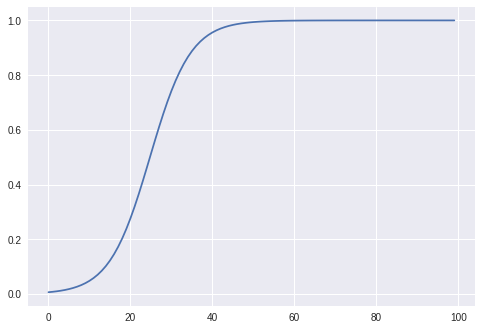

In [218]:
w=1 #@param {type: "slider", min: -10, max: 10}
b=5 #@param {type: "slider", min: -2, max: 5}
Y=sigmoid(X,w,b)

plt.plot(Y)
plt.show()

In [0]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [0]:
sigmoid_2d(0,0,0,1,1)
from mpl_toolkits import mplot3d

In [221]:
print(Y)

[0.00669285 0.00817894 0.00999169 0.01220126 0.01489212 0.01816549
 0.0221422  0.02696557 0.03280439 0.0398557  0.04834692 0.0585369
 0.07071501 0.0851974  0.1023192  0.12242144 0.14583148 0.17283646
 0.20364993 0.23837374 0.2769591  0.31917283 0.36457644 0.41252537
 0.46219351 0.51262358 0.56279795 0.61171941 0.65848849 0.70236512
 0.74280635 0.77947787 0.81224231 0.8411309  0.86630626 0.88802329
 0.906593   0.92235245 0.93564176 0.94678783 0.95609412 0.963835
 0.97025357 0.97556186 0.97994246 0.98355107 0.98651937 0.98895804
 0.99095959 0.99260104 0.99394628 0.99504815 0.99595028 0.99668861
 0.9972927  0.99778682 0.99819093 0.99852136 0.99879151 0.99901235
 0.99919286 0.99934041 0.999461   0.99955955 0.99964009 0.9997059
 0.99975969 0.99980364 0.99983955 0.9998689  0.99989288 0.99991247
 0.99992848 0.99994156 0.99995225 0.99996098 0.99996812 0.99997395
 0.99997872 0.99998261 0.99998579 0.99998839 0.99999051 0.99999225
 0.99999367 0.99999483 0.99999577 0.99999655 0.99999718 0.99999769

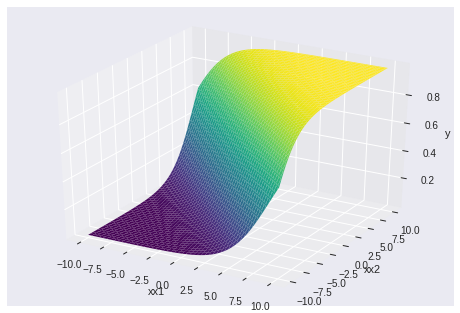

In [222]:
X1=np.linspace(-10,10,100)
X2=np.linspace(-10,10,100)
w1=0.5
w2=0.5
b=0.5
XX1, XX2 = np.meshgrid(X1,X2)
Y=sigmoid_2d(XX1,XX2,w1,w2,b)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('xx1')
ax.set_ylabel('xx2')
ax.set_zlabel('y');

In [0]:
mcap=matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

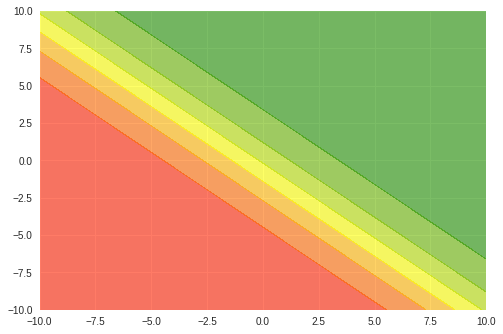

In [224]:
plt.contourf(XX1,XX2,Y,cmap=mcap,alpha=0.6)
plt.show()

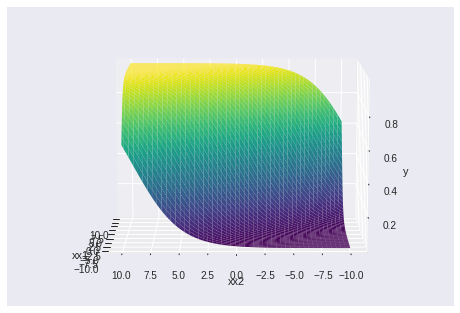

In [225]:
ax.view_init(10, 180)
fig

In [226]:
X=np.random.random(25)*20-10
Y=sigmoid(X,.5,.25)
X

array([-4.64745132, -3.19622253,  8.07140546,  6.27921658,  3.16585565,
       -2.72047666, -1.09472237, -0.4952492 ,  7.87355071, -5.20817519,
       -3.58150559,  7.27017591, -5.7549654 , -4.47440852, -8.01862267,
        3.6035587 , -9.42188576, -7.67418978, -1.90776823, -5.34999455,
        2.30471535, -2.92798934, -3.24314513,  1.30219256,  6.78161208])

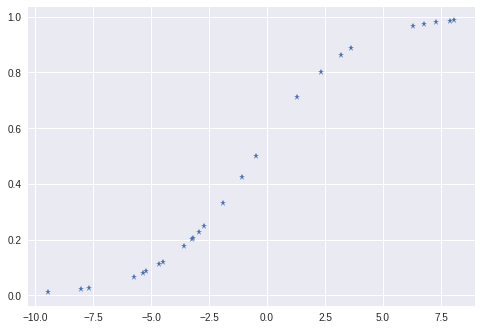

In [227]:
plt.plot(X,Y,'*')

In [0]:
W=np.linspace(-1,1,101)
B=np.linspace(-1,1,102)

ww,bb=np.meshgrid(W,B)

In [0]:
def loss(X,Y,w_est,b_est):
  loss=0
  for x,y in zip(X,Y):
    loss+=(y-sigmoid(x,w_est,b_est))**2
  return loss

In [0]:
Loss=np.zeros(ww.shape)

In [0]:
for i in range(ww.shape[0]):
  for j in range(ww.shape[1]):
    Loss[i,j]=loss(X,Y,ww[i,j],bb[i,j])

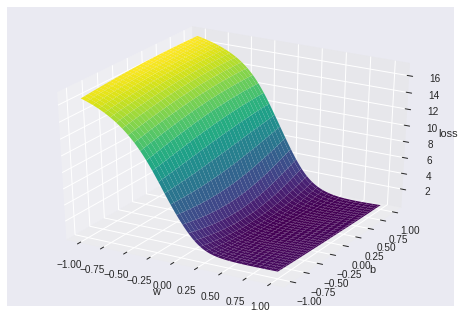

In [232]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(ww, bb, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss');

In [0]:
ij=np.argmin(Loss)
i=int(np.floor(ij/Loss.shape[1]))
j=int(ij-i*Loss.shape[1])

In [234]:
print(i,j)

63 75


In [235]:
print(ww[i,j],bb[i,j])

0.5 0.24752475247524752


In [236]:
print(Loss.shape)

(102, 101)


In [0]:
class sigmoid_neuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
    
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True,display_loss=True):
    
    # initialise w, b
    if display_loss:
      loss={}
    
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
    
    for i in tqdm_notebook(range(epochs),total=epochs,unit="epochs"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred=self.sigmoid(self.perceptron(X))
        loss[i]=mean_squared_error(Y_pred,Y)
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel("epochs")
      plt.ylabel("mean squared error")
      plt.show()
  
  def predict(self,X):
    Y_pred=[]
    for x in X:
      y_pred=(self.sigmoid(self.perceptron(x)))
      Y_pred.append(y_pred)
    return np.array(Y_pred)
        

In [0]:
sn=sigmoid_neuron()

In [0]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[i], X2[j]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap=mcap, alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap=mcap)
  ax.plot()

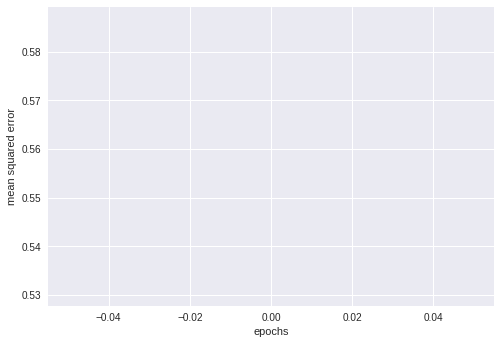

[[-0.3932209   0.45255516]] [0.00127793]


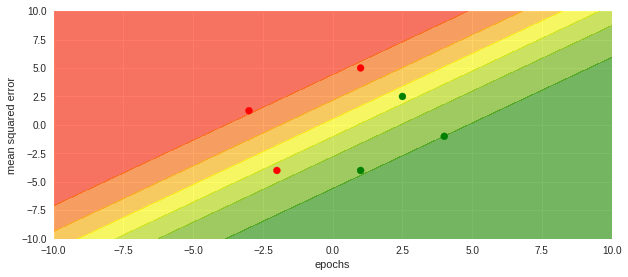

[[0.13585845 0.17450488]] [0.0150055]


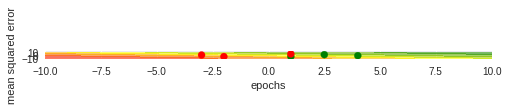

[[ 0.64254537 -0.40167512]] [0.01480306]


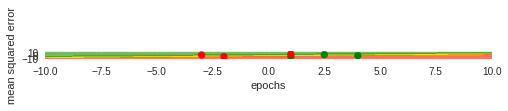

[[ 0.88492188 -0.12342949]] [-0.03097818]


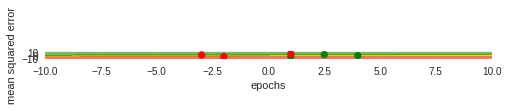

[[ 0.89344983 -0.44693631]] [-0.09426259]


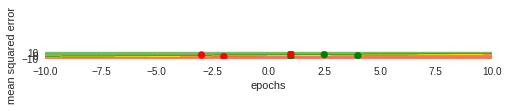

[[ 1.06653167 -0.22939256]] [-0.14100491]


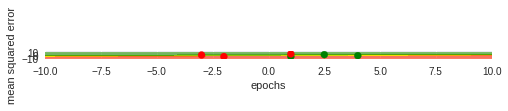

[[ 1.07124369 -0.4531617 ]] [-0.19802732]


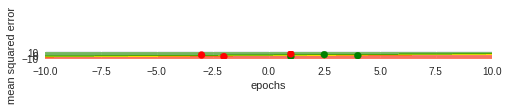

[[ 1.1868251  -0.32494765]] [-0.23848722]


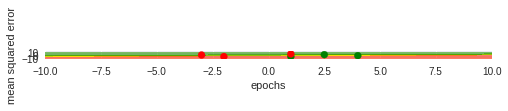

[[ 1.20711017 -0.44108997]] [-0.28264485]


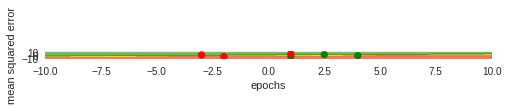

[[ 1.27598767 -0.39881487]] [-0.31671869]


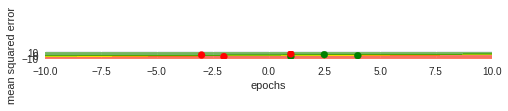

[[ 1.30972774 -0.4414652 ]] [-0.35071986]


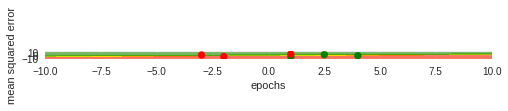

[[ 1.35418716 -0.44240282]] [-0.38038873]


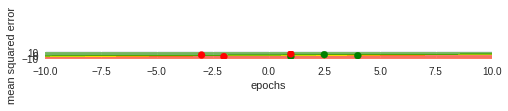

[[ 1.38997664 -0.45854008]] [-0.40844862]


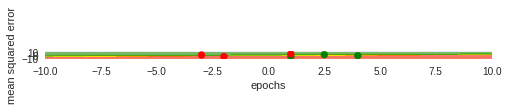

[[ 1.42508666 -0.46859794]] [-0.43430615]


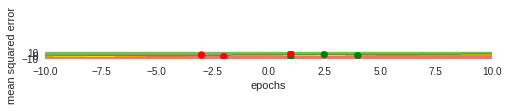

[[ 1.45747566 -0.47932138]] [-0.45847532]


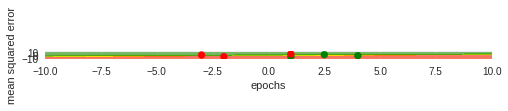

[[ 1.48799278 -0.48912662]] [-0.48107707]


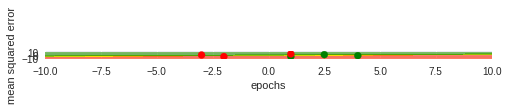

[[ 1.51673851 -0.49840737]] [-0.50229146]


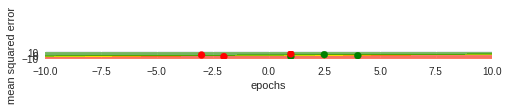

[[ 1.54391236 -0.50717646]] [-0.52225892]


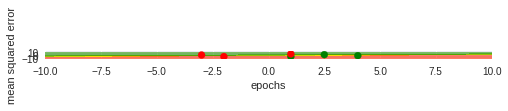

[[ 1.56966925 -0.51548885]] [-0.54110289]


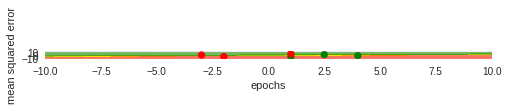

[[ 1.59414408 -0.52338788]] [-0.55893044]


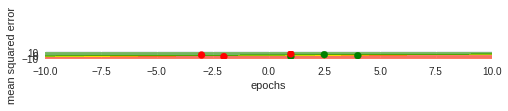

[[ 1.61745372 -0.5309113 ]] [-0.575835]


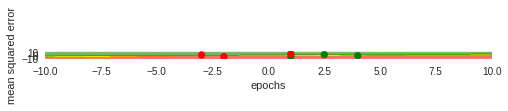

[[ 1.63970014 -0.53809204]] [-0.59189847]


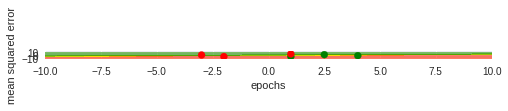

[[ 1.66097276 -0.54495899]] [-0.60719295]


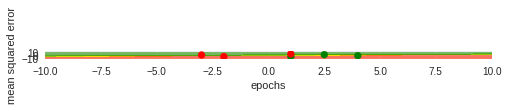

[[ 1.68135042 -0.55153759]] [-0.62178218]


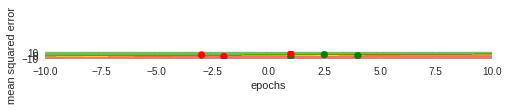

[[ 1.70090295 -0.5578504 ]] [-0.63572269]


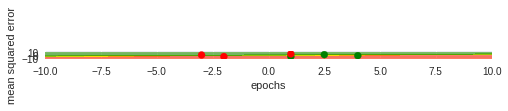

[[ 1.71969248 -0.56391745]] [-0.64906483]


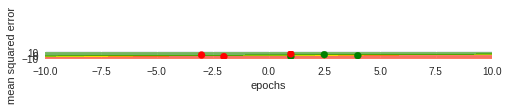

[[ 1.73777451 -0.56975666]] [-0.66185361]


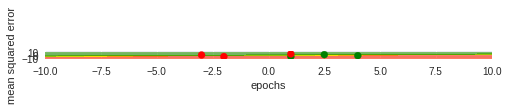

[[ 1.75519882 -0.57538409]] [-0.67412938]


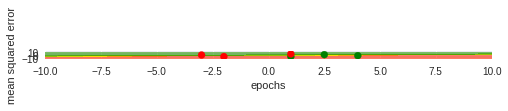

[[ 1.77201019 -0.58081417]] [-0.68592845]


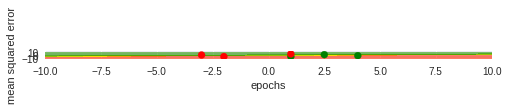

[[ 1.78824909 -0.58605995]] [-0.69728358]


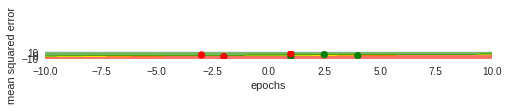

In [240]:
X=np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])

Y=np.asarray([1,1,1,0,0,0])
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)

In [241]:
print(X2.shape)

(100,)


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [243]:
file_id = '1_QRdWFgoyWV6_hPYghAIY8U_E8i6aaj7'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

Downloaded content "PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,Brand_Jivi,Brand_Karbonn,Brand_LG,Brand_Lava,Brand_LeEco,Brand_Lenovo,Brand_Lephone,Brand_Lyf,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KA

In [0]:
import pandas as pd

In [0]:
data =pd.read_csv("mobile_cleaned-1551253091700.csv")

In [246]:
!wgets https://drive.google.com/file/d/1_QRdWFgoyWV6_hPYghAIY8U_E8i6aaj7/view?usp=sharing

/bin/bash: wgets: command not found


In [0]:
X=data.drop('Rating',axis=1)

In [0]:
Y=data['Rating'].values

In [0]:
threshold=4.2
data['class']=(data['Rating']>=threshold)*1

In [250]:
data['class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: class, dtype: float64

In [0]:
Y_binarised=data['class'].values

In [0]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [0]:
Scalar=StandardScaler()

In [0]:
R=np.random.random([100,1])

In [255]:
Scalar.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [256]:
print(R.mean())

0.5394767157752195


In [0]:
RR=Scalar.transform(R)

In [258]:
print(RR.std())

1.0


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,stratify=Y_binarised)

In [0]:
scalar=StandardScaler()

In [262]:
X_norm_train=scalar.fit_transform(X_train)
X_norm_test=scalar.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [0]:
minmax=MinMaxScaler()

In [0]:
Y_train_minmax=minmax.fit_transform(Y_train.reshape(-1,1))

In [0]:
Y_test_minmax=minmax.transform(Y_test.reshape(-1,1))

In [0]:
Y_scale_thresh=list(minmax.transform(np.asarray([(threshold)]).reshape(-1,1)))[0][0]

In [267]:
Y_scale_thresh

0.6800000000000002

In [0]:
Y_binarised_train=((Y_train_minmax >Y_scale_thresh)*1).ravel()
Y_binarised_test=((Y_test_minmax >Y_scale_thresh)*1).ravel()

In [0]:
sn=sigmoid_neuron()

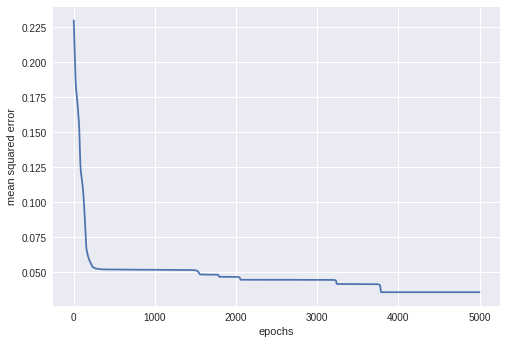

In [283]:
sn.fit(X_norm_train,Y_train_minmax,epochs=5000,learning_rate=0.02,display_loss=True)

In [0]:
Y_pred_train=sn.predict(X_norm_train)
Y_pred_test=sn.predict(X_norm_test)

In [0]:
Y_pred_bin_train=((Y_pred_train >Y_scale_thresh)*1).ravel()
Y_pred_bin_test=((Y_pred_test >Y_scale_thresh)*1).ravel()

In [273]:
X_norm_test.shape

(86, 87)

In [0]:
accuracy_train=accuracy_score(Y_binarised_train,Y_pred_bin_train)
accuracy_test=accuracy_score(Y_binarised_test,Y_pred_bin_test)

In [275]:
print(accuracy_train,accuracy_test)

0.8274509803921568 0.8372093023255814
